## **Importing my toolsets**

In [2]:
import processing as pro
import fitting as fit
import visualize as vis
import peaks as pks
import numpy as np

# **Specifying location of our file**

In [3]:
file_path = "../Raman/Cs1.xlsx"  # Change this to your Raman data file path

# **Reading our datafile. If datafile is a map, specify map = True. col_num specifies which spectrum you would like to plot from input map file.**

In [4]:
raman_shift, intensity, df, yx = pro.read_raman_data(file_path, col_num = 1, map = False, csv = False) 

Reading Excel file...


,eV,counts
0,299.975,2746.6665
1,299.950,2700.0000
2,299.925,2693.3333
3,299.900,2670.0000
4,299.875,2806.6665
...,...,...
994,275.125,2713.3333
995,275.100,2690.0000
996,275.075,2700.0000
997,275.050,2683.3333


In [5]:
raman_shift = np.array(sorted(raman_shift))

In [6]:
display(yx)

None

# **Normalizing the data**

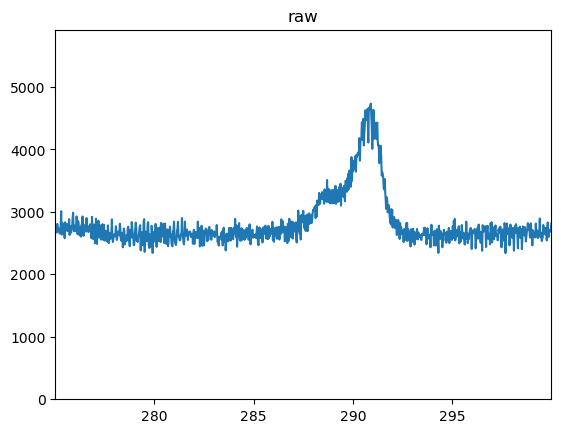

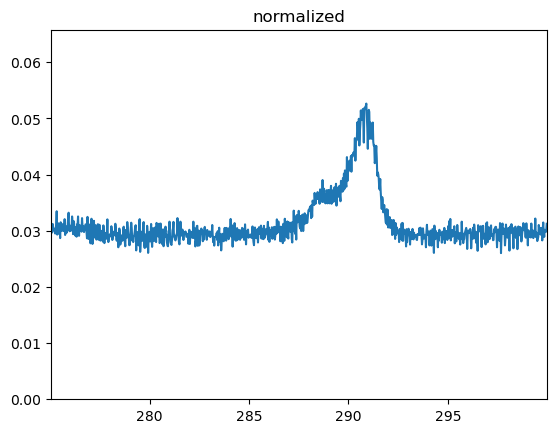

In [7]:
intensity = pro.normalize(raman_shift, intensity)

# **Guess of deg**

In [8]:
deg = 1

# **Removing the baseline, adjusting the degrees may be necessary as oscillation can occur if set too high or low**

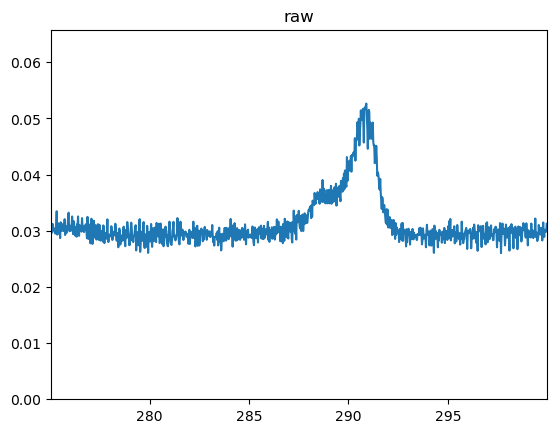

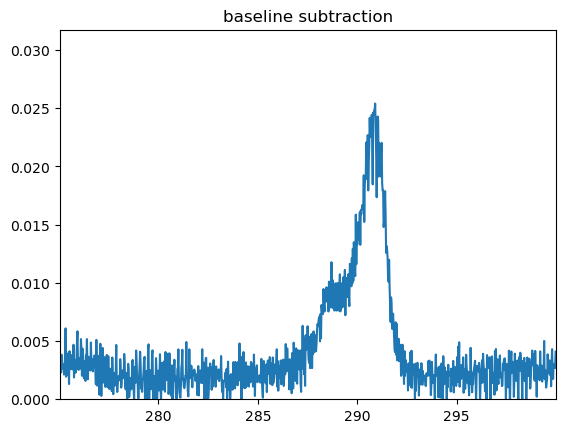

In [9]:
intensity = pro.remove_baseline(raman_shift, intensity, deg)

# **Height and spacing parameters**

In [10]:
height = 0.01
spacing = 50

## **Calculating the peaks from the raw data for use in guessing the fits**

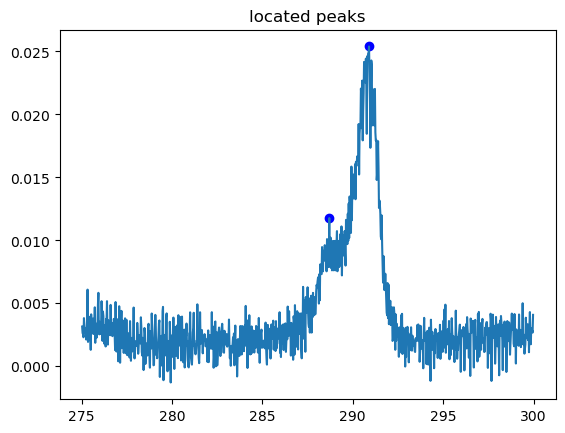

In [11]:
peaks = pks.identify_peaks(raman_shift, intensity, height, spacing)

# **Fitting via lorentzian**

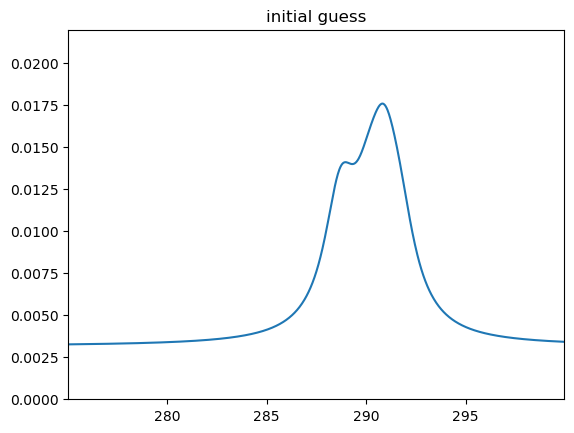

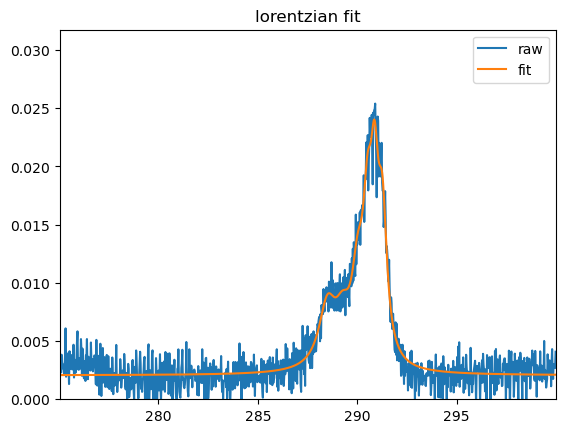

R^2 score: 0.9288262582513439


In [12]:
l_fit_int, l_r2 = fit.raman_lfitter(raman_shift, intensity, peaks)

## **Fitting via gaussian**

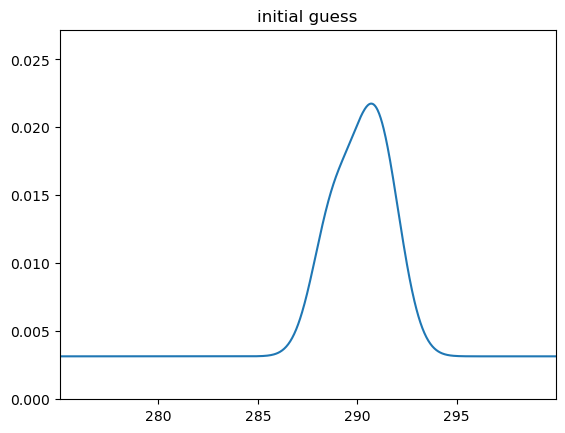

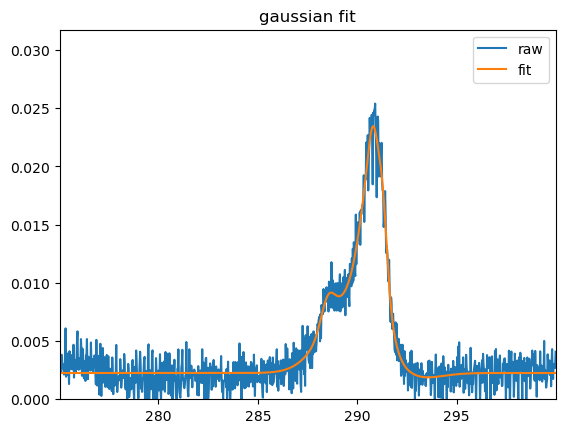

R^2 score: 0.9323102250351856


In [13]:
g_fit_int, g_r2 = fit.raman_gfitter(raman_shift, intensity, peaks)

# **Fitting via voigt**

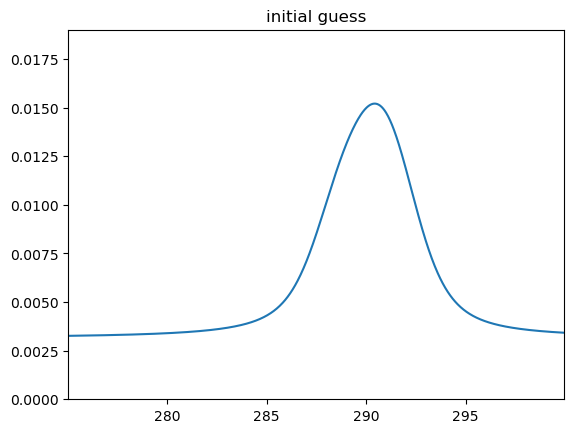

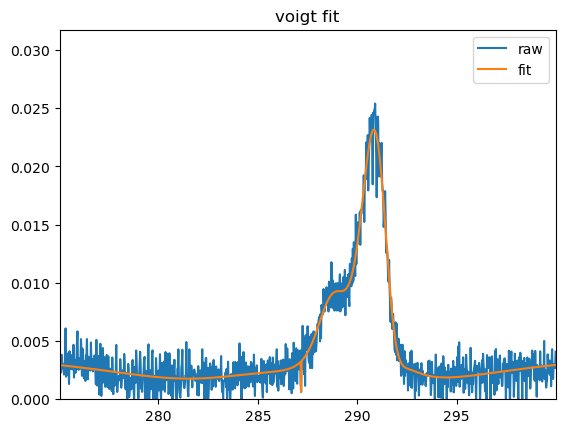

R^2 score: 0.9353099669407801


In [14]:
v_fit_int, v_r2 = fit.raman_vfitter(raman_shift, intensity, peaks)

# **Picking the best fit**

In [15]:
intensity = g_fit_int

# **Calculating the peaks from fitted data**

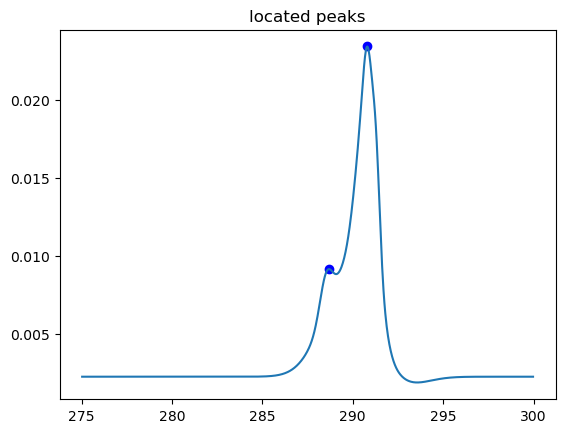

In [16]:
peaks = pks.identify_peaks(raman_shift, intensity, 0.007, 50)

In [17]:
display(peaks)

{'peak_indices': array([546, 631]),
 'peak_intensity': array([0.00916314, 0.02345823]),
 'peak_raman_shifts': array([288.675, 290.8  ]),
 'peak_widths': [0.32676545761330544, 1.5586091222926939],
 'width_heights': array([0.00900297, 0.0128574 ]),
 'left_ips': array([288.5454647 , 289.93213473]),
 'right_ips': array([288.87223015, 291.49074385])}

# **Calculating the area underneath every peak**

In [18]:
peak_integrals = pks.peak_integrals(peaks, raman_shift, intensity)

## **User input cell: Name of material, labels of peaks (left to right), ratio you want to calculate (2 in place of location of numerator peak, 1 for denominator. For example, if labels = ["1st", "2nd", "3rd"], and I want the "3rd"/"2nd" ratio, I would set desired_ratio = [0,1,2])**

In [19]:
material = "xps"
labels = ['d', 'g']
desired_ratio = [1,2]

# **Calculating the ratios (intensity and areas)**

In [20]:
int_ratio = pks.intensity_ratio(desired_ratio, peaks)
area_ratio = pks.integral_ratio(desired_ratio, peak_integrals)
display(int_ratio)
display(area_ratio)

2.5600644477231707

6.156093549713049

# **Labelling the ratio**

In [21]:
ratio_label, ratio_df = pks.ratiolabeler(labels, desired_ratio, int_ratio, area_ratio)

# **Calculating all possible peak-to-peak distances**

In [22]:
distances, dist_labels, distance_df = pks.peak_distances(peaks, labels)

# **Visualizing the data**

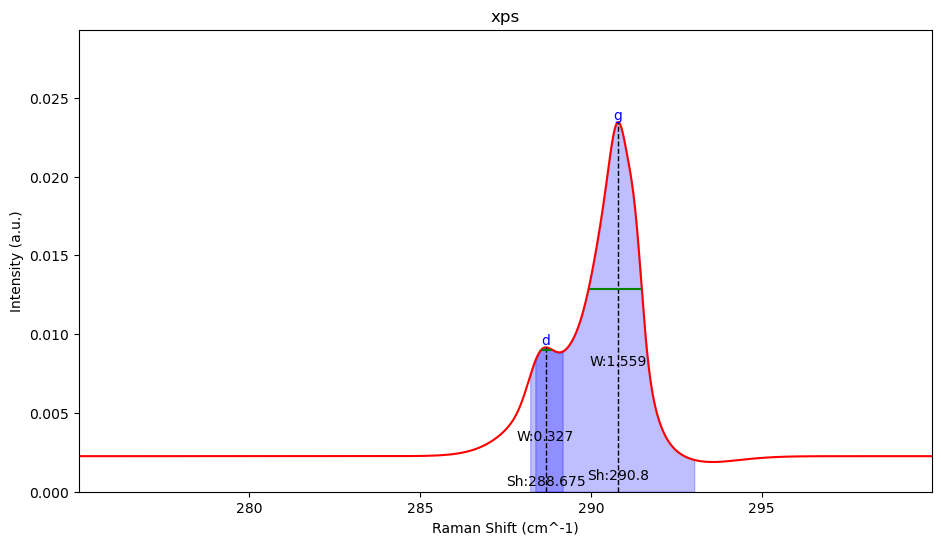

,Intensity,Integral
g/d,2.560064,6.156094


,d-g
Peak distances,2.125


{'peak_indices': array([546, 631]),
 'peak_intensity': array([0.00916314, 0.02345823]),
 'peak_raman_shifts': array([288.675, 290.8  ]),
 'peak_widths': [0.32676545761330544, 1.5586091222926939],
 'width_heights': array([0.00900297, 0.0128574 ]),
 'left_ips': array([288.5454647 , 289.93213473]),
 'right_ips': array([288.87223015, 291.49074385])}

In [23]:
vis.plot_spectrum(raman_shift, intensity, peaks, labels, material)
display(ratio_df)
display(distance_df)
display(peaks)

# **If it's a map, run this cell**

In [24]:
avg_ratio, heatmap, r2map, spectra = vis.heat_map(df, yx, raman_shift, height, spacing, deg, desired_ratio, 
                                                  ratio_label, voigt = True, lorentzian = False, gaussian = False)

KeyError: '[0] not found in axis'

# **Visualizing the heatmaps**

In [25]:
display(heatmap)
display(r2map)

NameError: name 'heatmap' is not defined

# **If you're curious about any point on the heatmap, type in your desired x and y coordinates in the last two arguments of this cell**

In [ ]:
vis.lookup_spectrum(raman_shift, spectra, 5, 2.5)

# **Need information regarding any module or function? You can simply type "help(module_name)" for modules and "help(function_name)" for functions.**

In [ ]:
help(pks.identify_peaks)